<a href="https://colab.research.google.com/github/mich3leRusso/Deep_learning_last/blob/main/fixed_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'bugnist2024fgvc:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F71698%2F7906362%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240503%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240503T144345Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D62948ba0cef5adfbb68a95c247dfe452fed1c1559170dcb5a4baa2fe671ebddda2d43f92f30ce04c2446539962bcc9ccc55a0a57389941e43720a5bab8a9697d190a6ed0561be006eb07be652fe0a067c0c64ba899dbfdfb9df33d460f67be4a11accda17850778b00ad915543b40f25b132da7111a294ee94121f396112b8936406b2bf0574bafc11c633ad0fbc7d70b196f34cd0d9ebcb77b75c99d5db3ca51bc707b5455a031dec98dd8a6fe0646b04859da5b433d92534de7b37c9b7e3970113b909d1dc9a94e1601f49773dadb573e4292d175e38c1f5960675436c69542e09a1b0986fb4aea40cad69a440215e78a961cd150f86274e1d2701d8fe50bd'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 709799651 bytes downloaded
Downloaded and uncompressed: bugnist2024fgvc
Data source import complete.


In [18]:
!pip install -q qim3d

In [19]:
#import monai
!pip install monai

In [35]:
#import the classes
import os
import glob
import csv
import monai
import numpy as np
import torch
from tqdm import tqdm, trange

In [21]:
# Path to individual bugs
data_dir = '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train'
#Path for the validation set
data_val = '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/validation'

Support for third party widgets will remain active for the duration of the session. To disable support:

Support for third party widgets will remain active for the duration of the session. To disable support:

In [22]:

images_train = [] #contains just thepath and the filname
labels_train = []

class_names = os.listdir(data_dir)
class_image_files = [
    glob.glob(os.path.join(data_dir, name, '*')) for name in class_names
]

for i, files in enumerate(class_image_files):
    images_train += files

    labels_i = torch.zeros(len(files), len(class_names))
    labels_i[:, i] = 1
    labels_train.append(labels_i)


labels_train = torch.cat(labels_train, dim=0)

In [23]:
files = os.listdir(data_val)

# Filter out only the .tif files
tif_files = [file for file in files if file.endswith('.tif')]

images_val=[]
# Print the names of the .tif files
for tif_file in tif_files:
    paths=data_val+"/"+tif_file
    images_val.append(paths)



In [24]:
print(len(images_train))
print(len(labels_train))
#show one label
print(labels_train[0])

9154
9154
tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [25]:
#visualize the name of the labels
print("number of labels", len(class_names))
print("labels: ",class_names)
print(images_train)

number of labels 12
labels:  ['WO', 'GH', 'BC', 'AC', 'ML', 'CF', 'BL', 'BF', 'BP', 'MA', 'PP', 'SL']
['/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train/WO/bank_8_000.tif', '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train/WO/bank_4_065.tif', '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train/WO/bank_7_044.tif', '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train/WO/bank_8_007.tif', '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train/WO/bank_4_079.tif', '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train/WO/bank_7_035.tif', '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train/WO/bank_6_110.tif', '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train/WO/bank_5_062.tif', '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train/WO/bank_8_003.tif', '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train/WO/bank_6_070.tif', '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train/WO/bank_6_036.tif', '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train/WO/bank_3_031.tif', '/kaggle/input/bugnist2024fgvc/BugNIST_DATA/train/WO/bank

In [41]:
# Path to your CSV file
file_path = data_val+"/validation.csv"

# Dictionary to store labels and coordinates for each filename
filename_info = {}

# Open the CSV file
with open(file_path, mode='r') as csv_file:
    # Create a CSV reader object
    csv_reader = csv.DictReader(csv_file)

    # Iterate over each row in the CSV file
    for row in csv_reader:
        # Extract filename and centerpoints
        filename = row['filename']
        centerpoints = row['centerpoints']

        # Split centerpoints by semicolon
        bug_info = []
        array_split=centerpoints.split(';')
        for i in range(0,len(array_split),4):
            # Split the bug string into label and coordinates
            label = array_split[i]  # Extract the label (assuming labels are always two characters)
            coordinates = array_split[i+1:i+4]  # Extract coordinates
            bug_info.append((label, coordinates))

        # Store labels and coordinates for the filename
        filename_info[filename] = bug_info

# Print filename_info dictionary
for filename, info in filename_info.items():
    print("Filename:", filename)
    print("Bug Info:")
    for label, coordinates in info:
        print("Label:", label)
        print("Coordinates:", coordinates)
    print()


Filename: mix_02_006.tif
Bug Info:
Label: bl
Coordinates: ['48.61', '39.14', '96.19']
Label: bl
Coordinates: ['77.71', '53.14', '57.17']
Label: pp
Coordinates: ['58.71', '73.71', '59.15']
Label: pp
Coordinates: ['48.42', '45.33', '51.75']
Label: pp
Coordinates: ['19.84', '62.44', '40.23']
Label: pp
Coordinates: ['22.67', '30.00', '53.13']
Label: pp
Coordinates: ['29.98', '42.06', '60.16']
Label: bc
Coordinates: ['78.57', '57.98', '41.85']
Label: bc
Coordinates: ['30.56', '19.43', '65.24']
Label: bc
Coordinates: ['29.44', '59.37', '47.22']

Filename: mix_02_011.tif
Bug Info:
Label: ml
Coordinates: ['77.86', '46.26', '57.79']
Label: sl
Coordinates: ['41.14', '61.93', '32.37']
Label: sl
Coordinates: ['56.09', '48.52', '56.20']
Label: cf
Coordinates: ['34.21', '70.82', '53.24']
Label: cf
Coordinates: ['52.70', '61.51', '44.71']
Label: cf
Coordinates: ['46.03', '15.26', '35.94']

Filename: mix_03_001.tif
Bug Info:
Label: ml
Coordinates: ['54.20', '34.58', '81.43']
Label: ml
Coordinates: ['5

#Load The Class Reader

In [26]:
from monai.data import ImageReader
from skimage.io import imread

class TiffReader(ImageReader):
    def __init__(self):
        super().__init__()


    def get_data(self, img):
        return np.asarray(img), dict()


    def read(self, data, **kwargs):
        if isinstance(data, str):
            data = [data]

        return [imread(f) for f in data]


    def verify_suffix(self, filename):
        return filename.endswith('.tif') or filename.endswith('.tiff')

In [27]:
#copy an image
from copy import deepcopy
from monai.transforms import MapTransform

class CopyImaged(MapTransform):
    def __init__(self, key_to_copy, new_key, allow_missing_keys=False):
        super().__init__(key_to_copy, allow_missing_keys)
        self.key_to_copy = key_to_copy
        self.new_key = new_key


    def __call__(self, data):
        data = dict(data)
        data[self.new_key] = deepcopy(data[self.key_to_copy])
        return data


In [28]:
import monai.transforms as T
from skimage.io import imread

# Precompute padding to get equal side lengths
im0 = imread(images_train[0])
shape = torch.tensor(im0.shape)
padding = (0, int((shape[0] - shape[1]) // 2), int((shape[0] - shape[2]) // 2))

# Prepare train and test data loaders
keys = ['image', 'mask']
train_transforms = T.Compose([
    # Load the image
    T.LoadImaged(keys='image', reader=TiffReader, image_only=True),
    T.Resized(keys='image', spatial_size=shape),
    # Scale the intensity
    T.ScaleIntensityd(keys='image'),
    # Pad the image so all sides are equal
    T.BorderPadd(keys='image', spatial_border=padding),
    # Make a copy of the image, which is what will later be our mask
    CopyImaged(key_to_copy='image', new_key='mask'),
    # Smooth the image and then threshold it
    T.GaussianSmoothd(keys='mask', sigma=2),
    T.AsDiscreted(keys='mask', threshold=0.25, dtype=torch.long),
    # Only keep the largest connected component as the bug mask
    T.KeepLargestConnectedComponentd(keys='mask', applied_labels=[0]),
    # Apply normal data augmentations
    T.EnsureTyped(keys=['image', 'mask', 'label'], track_meta=False),
    T.RandAffined(
        keys=['image', 'mask'], prob=0.95, rotate_range=(np.pi/2,) * 3,
        translate_range=shape // torch.tensor([2, 1, 1]), padding_mode='zeros'),
    T.RandAxisFlipd(keys=keys, prob=0.5),
    T.RandScaleIntensityd(keys='image', factors=0.25, prob=0.5),
    T.RandZoomd(keys=keys, prob=0.5),
    T.SqueezeDimd(keys='mask'),
    T.CastToTyped(keys='mask', dtype=torch.long),
])

val_transforms = T.Compose([
    # See train_transforms
    T.LoadImaged(keys='image', reader=TiffReader, image_only=True),
    T.Resized(keys='image', spatial_size=shape),
    T.ScaleIntensityd(keys='image'),
    T.BorderPadd(keys='image', spatial_border=padding),
    CopyImaged(key_to_copy='image', new_key='mask'),
    T.GaussianSmoothd(keys='mask', sigma=2),
    T.AsDiscreted(keys='mask', threshold=0.25, dtype=torch.long),
    T.KeepLargestConnectedComponentd(keys='mask', applied_labels=[0]),
    T.EnsureTyped(keys=['image', 'mask', 'label'], track_meta=False),
    T.SqueezeDimd(keys='mask'),
    T.CastToTyped(keys='mask', dtype=torch.long),
])

In [29]:
from monai.data import Dataset

train_data = Dataset(
    [{ 'image': f, 'label': l }
        for f, l in zip(images_train, labels_train)],
    transform=train_transforms,
)

val_labels=labels_train[:len(images_val)]#temp

val_data = Dataset(
    [{ 'image': f, 'label': l }
     for f, l in zip(images_val,val_labels )],
    transform=val_transforms,
)

In [30]:
from monai.data import DataLoader

train_batch_size = 4
val_batch_size = 4

train_loader = DataLoader(
    train_data,
    shuffle=True,
    num_workers=0,
    batch_size=train_batch_size,
)
val_loader = DataLoader(
    val_data,
    num_workers=0,
    shuffle=False,
    batch_size=val_batch_size,
)

In [31]:
for batch in val_loader:
    break

In [32]:
batch.keys()

dict_keys(['image', 'label', 'mask'])

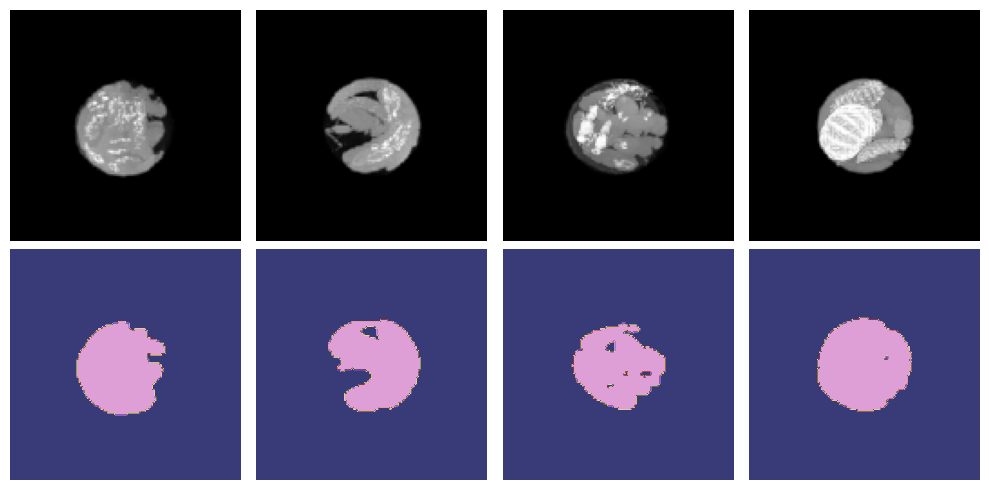

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(10, 5))
for i in range(4):
    ax[0, i].imshow(batch['image'][i, 0].cpu().numpy().max(axis=0), cmap='gray')
    ax[0, i].axis('off')
    ax[1, i].imshow(batch['mask'][i].cpu().numpy().max(axis=0), cmap='tab20b', vmin=0, vmax=1)
    ax[1, i].axis('off')
fig.tight_layout()

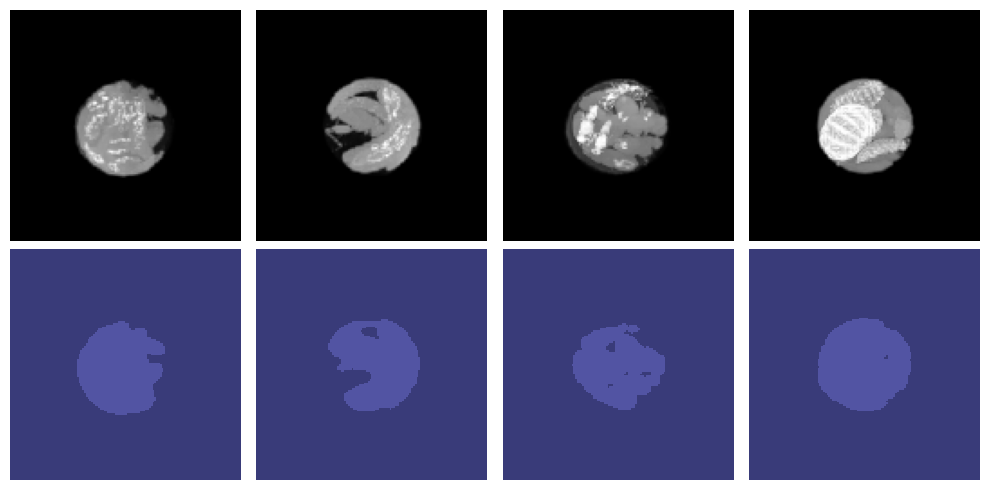

In [34]:
mask_label = batch['mask'] * (batch['label'].argmax(dim=1).view(-1, 1, 1, 1) + 1)

fig, ax = plt.subplots(2, 4, figsize=(10, 5))
for i in range(4):
    ax[0, i].imshow(batch['image'][i, 0].cpu().numpy().max(axis=0), cmap='gray')
    ax[0, i].axis('off')
    ax[1, i].imshow(mask_label[i].cpu().numpy().max(axis=0), cmap='tab20b',
                    vmin=0, vmax=len(class_names), interpolation='none')
    ax[1, i].axis('off')
fig.tight_layout()